In [1]:
import google.generativeai
# just to varify ki notebook env ko follow kr rhi hai ki nhi

In [2]:
# yeah worked. So it is following the env content

In [3]:
import google.generativeai as genai

In [6]:
genai.list_models()

<generator object list_models at 0x000001E4FEDE1040>

In [7]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [8]:
google_api_key = os.getenv("GOOGLE_API_KEY")

In [12]:
from llama_index.core import SimpleDirectoryReader
from llama_index.core import VectorStoreIndex
from llama_index.llms.gemini import Gemini
from IPython.display import Markdown, display
from llama_index.core import ServiceContext
from llama_index.core import StorageContext, load_index_from_storage

In [14]:
genai.configure(api_key = google_api_key)

In [15]:
for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-exp-1206
models/gemini-exp-1121
models/gemini-exp-1114
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental
models/embedding-001
models/text-embedding-004
models

In [16]:
for model in genai.list_models():
    if 'generateContent' in model.supported_generation_methods:
        print(model.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-exp-1206
models/gemini-exp-1121
models/gemini-exp-1114
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental


In [17]:
document = SimpleDirectoryReader("./Data")

In [18]:
document.load_data()

[Document(id_='9e2bed70-50a5-495d-8b22-b9d725b1717a', embedding=None, metadata={'file_path': 'c:\\Users\\prabh\\srijan\\QA_llamaindex_geminiAPI_embedding\\Data\\indian_railway_gyankosh.txt', 'file_name': 'indian_railway_gyankosh.txt', 'file_type': 'text/plain', 'file_size': 29199, 'creation_date': '2024-12-22', 'last_modified_date': '2024-12-22'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text="Indian Railways:- \r\n\r\nIndian Railways is a state-owned enterprise that is organised as a deparmental undertaking of the Ministry of Railways of the Government of India and operates India's national railway system.[a] As of 2023, it manages the f

Bhai shahb sara 4234 words are loaded

In [19]:
doc = document.load_data()

In [29]:
print(doc[0].text)

Indian Railways:- 

Indian Railways is a state-owned enterprise that is organised as a deparmental undertaking of the Ministry of Railways of the Government of India and operates India's national railway system.[a] As of 2023, it manages the fourth largest national railway system by size with a track length of 132,310 km (82,210 mi), running track length of 106,493 km (66,172 mi) and route length of 68,584 km (42,616 mi). As of August 2024, 96.59% of the broad-gauge network is electrified. With more than 1.2 million employees, it is the world's ninth-largest employer and India's second largest employer.

In 1951, the Indian Railways was established by the amalgamation of 42 different railway companies operating in the country, spanning a total of 55,000 km (34,000 mi). The railway network across the country was reorganized into six regional zones in 1951–52 for administrative purposes, which was gradually expanded to 18 zones over the years.

The first steam operated railway operated i

So my document of railway gyan kosh is loaded in the program successfully. Data Ingestion is done

In [21]:
# creating embedding now
for model in genai.list_models():
    if 'embedContent' in model.supported_generation_methods:
        print(model.name)

models/embedding-001
models/text-embedding-004


In [23]:
model = genai.GenerativeModel("gemini-1.5-pro-latest")

In [26]:
from llama_index.embeddings.gemini import GeminiEmbedding

In [27]:
gemini_embed_model = GeminiEmbedding(model_name = "models/embedding-001")

In [32]:
# configue service context
service_context = ServiceContext.from_defaults(
    llm = model,
    embed_model = gemini_embed_model,
    chunk_size = 800,
    chunk_overlap = 20
)

ValueError: ServiceContext is deprecated. Use llama_index.settings.Settings instead, or pass in modules to local functions/methods/interfaces.
See the docs for updated usage/migration: 
https://docs.llamaindex.ai/en/stable/module_guides/supporting_modules/service_context_migration/

This code snippet is configuring a **Service Context** for a document or language processing pipeline using `ServiceContext` from the `llama_index` library (or a similar library). It integrates components like an LLM (Large Language Model), an embedding model, and chunking parameters into a unified context for processing tasks.

Here’s a detailed explanation of each part:

---

### **1. `ServiceContext.from_defaults()`**
- **Purpose:** 
  The `ServiceContext` class acts as a container that holds configurations and reusable components required by various operations (e.g., building indices, querying data).
  - `from_defaults` is a helper method that allows you to quickly create a `ServiceContext` using default or custom settings.

---

### **2. Components of the `ServiceContext`**

#### **a. `llm = model`**
- This assigns the language model (`model`) to the `llm` parameter of the `ServiceContext`. 
- The language model is likely used to generate or process text (e.g., generating responses, summarizing content, or answering questions).
- Example: A model like OpenAI's GPT, Google's Gemini, or a similar LLM.

---

#### **b. `embed_model = gemini_embed_model`**
- Assigns the embedding model (`gemini_embed_model`) to the `embed_model` parameter.
- Embedding models convert text into numerical vectors for similarity computations, clustering, or retrieval tasks.
- The `gemini_embed_model` likely supports embeddings tailored for semantic search or similarity scoring.

---

#### **c. `chunk_size = 800`**
- Refers to the maximum size (in characters or tokens) of text chunks.
- Long documents are often split into smaller pieces (chunks) to fit within model limits or to improve processing accuracy.
- **Why it’s important:**
  - Prevents exceeding token limits of the LLM or embedding model.
  - Allows for efficient processing by splitting the text into manageable pieces.

---

#### **d. `chunk_overlap = 20`**
- Specifies how much overlap (in characters or tokens) exists between consecutive chunks.
- **Why it’s important:**
  - Ensures continuity between chunks so that important context is not lost.
  - Helps in tasks like summarization or question answering where context from adjacent chunks might be necessary.

---

### **What Does This Configuration Enable?**
The `ServiceContext` acts as a unified configuration for:
1. **Indexing Text Data:** Efficiently creating an index for large text corpora.
2. **Retrieval Tasks:** Using embeddings to find relevant chunks of text.
3. **Querying:** Leveraging both embeddings and LLM for semantic search, Q&A, or summarization tasks.
4. **Chunking Strategy:** Ensuring that the text is processed in manageable pieces while retaining context.

---

### **Example Use Case**
Imagine you’re working on a system to query a large document (e.g., research papers):
1. Split the document into smaller chunks (`chunk_size` and `chunk_overlap` are applied).
2. Use `gemini_embed_model` to create embeddings for these chunks.
3. Store these embeddings in an index for fast retrieval.
4. Use the `model` (LLM) to generate responses by combining retrieved chunks.

---

Let me know if you’d like further clarification or additional examples!

In [36]:
from llama_index.core import Settings

Thanks for sharing the detailed excerpt from the LlamaIndex documentation. This indeed sheds light on the newer `Settings` object and its usage in place of the older `ServiceContext`. Here's a breakdown and explanation of how it works:

---

### **Understanding `Settings`**

`Settings` is a **singleton object** introduced to standardize and simplify the configuration of various components in LlamaIndex workflows. Instead of setting configurations individually for LLMs, embeddings, tokenizers, etc., it allows a **global configuration** for these components that can be overridden locally when needed.

---

### **Key Features of `Settings`**

1. **Centralized Configuration**  
   Define global defaults for:
   - **LLM** (e.g., OpenAI GPT models).
   - **Embedding Models** (e.g., OpenAIEmbedding).
   - **Text Splitters** for chunking documents.
   - **Tokenizers** for token counting.
   - **Callbacks** for monitoring events (e.g., token usage).

2. **Local Overrides**  
   You can override global settings for specific use cases (like querying or indexing) by passing components directly to the relevant interfaces.

3. **Singleton Pattern**  
   `Settings` persists throughout the application and ensures consistent behavior unless explicitly overridden.

---

### **How to Use `Settings`**

1. **Configuring an LLM:**
   ```python
   from llama_index.llms.openai import OpenAI
   from llama_index.core import Settings

   Settings.llm = OpenAI(model="gpt-3.5-turbo", temperature=0.1)
   ```

2. **Configuring an Embedding Model:**
   ```python
   from llama_index.embeddings.openai import OpenAIEmbedding
   from llama_index.core import Settings

   Settings.embed_model = OpenAIEmbedding(
       model="text-embedding-ada-002", embed_batch_size=100
   )
   ```

3. **Customizing Text Splitters:**
   ```python
   from llama_index.core.node_parser import SentenceSplitter
   from llama_index.core import Settings

   Settings.text_splitter = SentenceSplitter(chunk_size=1024)
   ```

4. **Setting a Callback Manager:**
   ```python
   from llama_index.core.callbacks import TokenCountingHandler, CallbackManager
   from llama_index.core import Settings

   token_counter = TokenCountingHandler()
   Settings.callback_manager = CallbackManager([token_counter])
   ```

---

### **How It Helps Compared to `ServiceContext`**

1. **Simplifies Migration:**  
   Instead of creating a `ServiceContext` object, you directly use `Settings` for global defaults and avoid unnecessary code repetition.

2. **Flexibility with Overrides:**  
   Local overrides are cleaner and allow modular configurations for indexing and querying.

3. **Future Compatibility:**  
   As `ServiceContext` is deprecated, `Settings` ensures compatibility with the latest LlamaIndex updates.

---

### **Applying It to Your Code**

If you're encountering the deprecation of `ServiceContext`, the equivalent `Settings` configuration for your case would look like this:

```python
from llama_index.core import Settings
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding

# Configure global settings
Settings.llm = OpenAI(model="gpt-3.5-turbo", temperature=0.7)
Settings.embed_model = OpenAIEmbedding(model="text-embedding-ada-002")
Settings.chunk_size = 800
Settings.chunk_overlap = 20

# Local override during indexing
index = VectorStoreIndex.from_documents(documents)

# Local override during querying
query_engine = index.as_query_engine(llm=Settings.llm)
```

---

### **Next Steps**

- Ensure you have the latest `llama_index` version using `pip install --upgrade llama-index`.
- Replace `ServiceContext` usage with `Settings` where needed.
- Refer to the official [LlamaIndex documentation](https://docs.llamaindex.ai/) for detailed examples and updates.

Let me know if you'd like help refactoring your specific code!

In [44]:
response = model.generate_content("What is LlamaIndex?")
print(response.text)

LlamaIndex (formerly GPT Index) is a data framework that allows you to connect your own data to large language models (LLMs) like GPT-3, GPT-4, and others.  It solves the context window limitation problem of LLMs by structuring your data and allowing the LLM to access relevant parts as needed.  Think of it as a bridge between your private data and the vast knowledge within an LLM.

Here's a breakdown of its key features and benefits:

* **Data Connection:** LlamaIndex can connect to various data sources, including:
    * **Documents:** PDFs, Word files, text files, web pages, etc.
    * **Code:** Python files, Javascript files, etc.
    * **APIs:** Access data from various APIs.
    * **Databases:** Structured data from SQL databases.

* **Data Indexing:**  LlamaIndex structures your data into different index types optimized for various query types.  These indexes allow for efficient retrieval of relevant information. Common index types include:
    * **List Index:** Simple list of tex

In [45]:
import llama_index.llms as llms

# List all attributes of the llms module
print(dir(llms))

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'gemini']


In [46]:
import llama_index.llms.gemini as gemini

print(dir(gemini))

['Gemini', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'base', 'utils']


In [47]:
from llama_index.llms.gemini import Gemini
from llama_index.core import Settings

In [50]:
gemini = Gemini()

In [51]:
print(dir(Gemini))

['__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__class_vars__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields_set__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pretty__', '__private_attributes__', '__pydantic_complete__', '__pydantic_computed_fields__', '__pydantic_core_schema__', '__pydantic_custom_init__', '__pydantic_decorators__', '__pydantic_extra__', '__pydantic_fields__', '__pydantic_fields_set__', '__pydantic_generic_metadata__', '__pydantic_init_subclass__', '__pydantic_parent_namespace__', '__pydantic_post_init__', '__pydantic_private__', '__pydantic_root_model__', '__pydantic_serializer__', '__pydantic_validator__', '__reduce__', '__reduce_ex__', '__replace__', '__repr__', '__

In [53]:
print(gemini.metadata)

context_window=1056768 num_output=8192 is_chat_model=True is_function_calling_model=False model_name='models/gemini-2.0-flash-exp' system_role=<MessageRole.SYSTEM: 'system'>


chalo atleast model ka name to pta chala : gemini-2.0-flash-exp

In [55]:
# Configure global settings
Settings.llm = Gemini(model = "models/gemini-2.0-flash-exp", temperature = 1.0)

In [56]:
from llama_index.embeddings.gemini import GeminiEmbedding

In [60]:
Settings.embed_model = GeminiEmbedding(model_name = "models/embedding-001")

In [61]:
Settings.chunk_size = 800
Settings.chunk_overlap = 20

In [62]:
index = VectorStoreIndex.from_documents(doc)

Bingo successfully index i have created

In [63]:
print(index)

In [64]:
index.storage_context.persist()

So locally the embeddings/number representation of data is saved. Aur total 7689 numbers are generated in 1D list

![Image 480.png](<attachment:Image 480.png>)
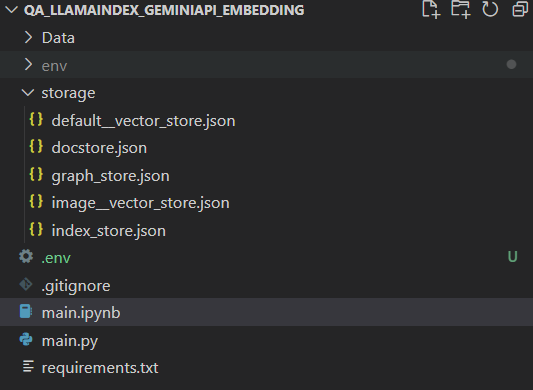

Here’s an explanation of the main components in `LlamaIndex` that you've mentioned: **`as_chat_engine`**, **`query_engine`**, and **`retriever`**, along with how they relate to each other.

---

### **1. `index.as_chat_engine()`**

The `as_chat_engine()` method converts an index into a chat-like query engine. It enables conversational interaction with the indexed content. You can use it to maintain context across multiple queries, simulating a chat experience.

#### **Usage Example**
```python
# Convert index to a chat engine
chat_engine = index.as_chat_engine()

# Start a chat session
response_1 = chat_engine.chat("Tell me about the quick brown fox.")
print(response_1)

response_2 = chat_engine.chat("What about the lazy dog?")
print(response_2)
```

#### **Key Features**
- Maintains context between questions.
- Useful for building conversational AI applications.

---

### **2. `index.as_query_engine()`**

The `as_query_engine()` method creates a query engine for retrieving and answering questions based on the indexed data. Unlike the chat engine, it doesn't maintain context between queries.

#### **Usage Example**
```python
# Convert index to a query engine
query_engine = index.as_query_engine()

# Perform queries
response = query_engine.query("What jumps over the lazy dog?")
print(response)
```

#### **Key Features**
- Designed for standalone queries.
- Best for single questions without conversational context.

---

### **3. `index.as_retriever()`**

The `as_retriever()` method enables retrieval of relevant documents or nodes based on a query. It doesn't generate natural language responses; instead, it focuses on fetching the most relevant data.

#### **Usage Example**
```python
# Convert index to a retriever
retriever = index.as_retriever()

# Retrieve documents
documents = retriever.retrieve("Tell me about the fox.")
for doc in documents:
    print(doc)
```

#### **Key Features**
- Retrieves raw documents or nodes.
- Can be paired with a custom LLM for generating responses.
- Useful when you want to control how the response is generated.

---

### **Comparison Table**

| Feature             | `as_chat_engine()`                  | `as_query_engine()`               | `as_retriever()`                     |
|---------------------|------------------------------------|-----------------------------------|-------------------------------------|
| **Context**          | Maintains context between queries  | No context                        | No context                          |
| **Response Type**    | Natural language responses         | Natural language responses        | Raw documents or nodes             |
| **Use Case**         | Conversational AI                 | Standalone questions              | Custom response generation pipeline |
| **Customization**    | Limited                          | Moderate                         | High                               |

---

### **How to Decide Which One to Use**

1. **For Conversational AI**  
   Use `as_chat_engine()` when building applications that require context maintenance across multiple queries.

2. **For Simple Q&A**  
   Use `as_query_engine()` for straightforward question-answering tasks without maintaining context.

3. **For Retrieval-Only Scenarios**  
   Use `as_retriever()` when you want to focus on retrieving raw documents for further processing, or if you need to integrate a custom LLM.

---

Let me know if you'd like a demonstration or further clarification!

for chat bot, i will use langchain

In [65]:
query_engine = index.as_query_engine()

In [70]:
response = query_engine.query("What is Indian Railway") # since document was indian railway gyankosh

In [71]:
print(response.response)

Indian Railways is a single entity formed by the amalgamation of 42 different railway companies. It operates various classes of passenger and express trains, and also operates three mountain railways in hilly terrain.



In [72]:
query_engine.query("How many different tyoes of coaches are operational in Indian Railway").response

'Indian Railways uses various specialized coach types for dedicated functions, including accident relief medical vans, brake vans, generator cars, inspection carriages, military cars, pantry cars, and parcel vans. Additionally, there are second sitting coaches, which are the most common and cheapest chair car coaches, and unreserved or general coaches.\n'

In [73]:
query_engine.query("Tell me about different types of trains being operated in Indian Railway").response

'Indian Railways operates various types of passenger and express trains, including Rajdhani Express, Shatabdi Express, Garib Rath Express, Double Decker Express, Tejas Express, Gatimaan Express, Humsafar Express, Duronto Express, Yuva Express, Uday Express, Jan Shatabdi Express, Sampark Kranti Express, Vivek Express, Rajya Rani Express, Mahamana Express, Antyodaya Express, Jan Sadharan Express, Suvidha Express and Intercity Express. Additionally, there are also semi-high speed train sets and high-speed rail options such as the Vande Bharat Express.\n'

In [74]:
query_engine.query("Tell me about Rajdhani Express").response

'Rajdhani Express trains were introduced in 1969 and were the first to reach speeds of up to 120 km/h. They are one of the various categories of express trains operated by Indian Railways.\n'

In [75]:
query_engine.query("What is the maximum speed of any train in IR, also which train achieves it.").response

'The Vande Bharat Express can reach a maximum speed of 180 km/h.\n'

In [76]:
query_engine.query("How does earth revolve around the sun").response

'I am sorry, but this document does not contain information about how the earth revolves around the sun. It is about Indian Railways.\n'

### Bingo Maja aa gya. Kya mst chatboot banaya hun